# **Aspect-Based Sentiment Analysis**

## **Extract Span and Polarity**

### Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

!pip install huggingface_hub
!pip install "setfit[absa]" -q
!pip install https://huggingface.co/firqaaa/id_core_news_trf/resolve/main/id_core_news_trf-any-py3-none-any.whl -q
!pip install spacy -q
!pip install datasets -q

from sklearn.model_selection import train_test_split

from datasets import Dataset

from setfit import AbsaModel, AbsaTrainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 66.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is inco

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


### Import Dataset

During this, we'll only need dataset from `Review`, `span`, `sentimen`, and `ordinal `columns. The rest of the columns are dropped. We'll also rename some columns to make it more comprehensive.

In [39]:
df = pd.read_csv('/content/drive/Shareddrives/Capstone/input/dataset labeled.csv')

df = df.drop(['No.', 'aspek'], axis=1)

df = df.rename(columns={'Review': 'text', 'sentimen': 'label'})

df.head()

,text,span,label,ordinal
0,"makanannya enak enak, pelayanannya juga mantap...",pelayanannya,positif,0
1,"Rasanya ga pernah bisa bohong, setiap ke McD s...",Rasanya,positif,1
2,"Rasanya selalu enak gak pernah berubah, higine...",Rasanya,positif,0
3,Pelayanannya cukup ramah dan praktis. Makanann...,Pelayanannya,positif,0
4,"Tempatnya nyaman bersih ,makanannya recommende...",Tempatnya,positif,0


In [40]:
df.to_csv('df_model1.csv', index=False)

### Split Dataset

Due to resource constraints, our current capacity allows us to train on 30% of the entire dataset. While this might seem limiting, it actually offers several advantages. By focusing on a smaller subset, we can:

1. Accelerate Iterations: Faster training times enable us to quickly iterate on model improvements and parameter tuning.
2. Efficient Resource Usage: We make the most of our computational resources without overloading our systems, ensuring stable and consistent performance.

In [ ]:
# Define the split index
split_index = int(0.3 * len(df))

# Split the dataset sequentially
train_df = df[:split_index]
test_df = df[split_index:]

# Verify the split
print(f"Training set size: {train_df.shape[0]}")
print(f"Test set size: {test_df.shape[0]}")

Training set size: 777
Test set size: 1816


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Prepare Dataset

In [35]:
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

In [36]:
train_dataset.to_csv('train_dataset_model1.csv', index=False)
test_dataset.to_csv('test_dataset_model1.csv', index=False)

Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Creating CSV from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

312209

### **Train Model 1 (Pre-trained Indo Setfit)**

Using a pre-trained Indo Setfit model, specific spans (phrases or words) within the review texts are identified. Each span is analyzed to determine its sentiment polarity, such as positive, negative, or neutral. The input for this step includes the 'review', 'span', and 'ordinal' columns from the dataset.

https://huggingface.co/firqaaa/setfit-indo-absa-restaurant-aspect

In our ABSA dashboard model development, we have made significant progress across multiple stages and files. To provide a comprehensive overview, we are consolidating all our work into a single IPython notebook.

**However, due to the extensive time required to train the models, we will include only the training code without executing it to produce outputs in this notebook.**

Download the pretrained model

In [ ]:
# Download from the 🤗 Hub
model = AbsaModel.from_pretrained(
    "firqaaa/indo-setfit-absa-bert-base-restaurants-aspect",
    "firqaaa/indo-setfit-absa-bert-base-restaurants-polarity",
    spacy_model="id_core_news_trf"
)

Train model

In [ ]:
from setfit import AbsaTrainer, TrainingArguments

args = TrainingArguments(
    use_amp=True,
    batch_size=32,
    num_epochs=1
)

trainer = AbsaTrainer(
    model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)
trainer.train()

### Save Model

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
model.push_to_hub("kaylaisya/absa")

### Model 1 evaluation

In [ ]:
# Model 1
model = AbsaModel.from_pretrained(
    "kaylaisya/absa-aspect",
    "kaylaisya/absa-polarity",
    spacy_model="id_core_news_trf"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/128k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/709k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config_setfit.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

model_head.pkl:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/742 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

config_setfit.json:   0%|          | 0.00/170 [00:00<?, ?B/s]

model_head.pkl:   0%|          | 0.00/33.7k [00:00<?, ?B/s]

In [ ]:
# Evaluate the model
trainer = AbsaTrainer(model)
metrics = trainer.evaluate(test_dataset)
print(metrics)

The ordinal of 1 for span 'Tempat' in 'Tempat makan dengan menu pilihan yang enak semua, apalagi es krim cone-nya favorite dari kecil, pelayanan yang cepat dan tempat yang bersih bisa berjam-jam di Mcd, apalagi parkir-an luas, oke banget' is too high. Skipping this sample.
The ordinal of 1 for span 'Tempatnya' in 'Tempatnya gak pas di tepi jalan, tapi agak menjorok ke dalam. JAdi lebih tenang dan cozy untuk makan sambil bekerja.\nAda playgroundnya juga, jadi yang bawa anak bisa bermain di situ' is too high. Skipping this sample.
The ordinal of 1 for span 'Tempatnya' in 'Secara standar mungkin sudah sesuai, kelebihannya tempatnya lebih luas dibandingkan mcD lain di sekitar bandung. Tempatnya cukup strategis dan nyaman. Kebersihan juga diperhatikan dengan baik dan pelayanannya ramah. Ramah anak juga.' is too high. Skipping this sample.
The ordinal of 1 for span 'Pelayanan' in 'Makanannya enak,,\nPelayanan nya baik dan nyaman sekali..\nSuasananya selalu ramai tapi tetap terlihat baik karn

***** Running evaluation *****


{'aspect': {'accuracy': 0.9345444830349987}, 'polarity': {'accuracy': 0.9017857142857143}}


### **Loading and Predicting with Model 1**

This part demonstrates how to preprocess input data, load the pretrained models, and make predictions on a given dataset.

In [ ]:
from setfit import AbsaModel
import pandas as pd

class Model1:
    def __init__(self, spacy_model="id_core_news_trf"):
        self.spacy_model = spacy_model
        self.trainer = AbsaModel.from_pretrained("kaylaisya/absa-aspect","kaylaisya/absa-polarity",spacy_model=spacy_model)

    def preprocess_csv(self, file_path, text_column='Review', label_column='sentimen', drop_columns=None):
        """
        Memproses file CSV untuk mengeluarkan teks.
        Returns:
        - list: Daftar teks.
        """
        df = pd.read_csv(file_path)
        if drop_columns:
            df = df.drop(drop_columns, axis=1)
        df = df.rename(columns={text_column: 'text', label_column: 'label'})
        texts = df['text'].tolist()
        return texts

    def extract_spans_from_texts(self, texts):
        """
        Membuat prediksi menggunakan model yang telah disimpan.
        Returns:
        - list: Daftar prediksi untuk setiap teks.
        """
        preds = [self.trainer.predict(text) for text in texts]
        for text, pred in zip(texts, preds):
            print(pred)
        return preds

    def input_model2(self, file_path, text_column='Review', label_column='sentimen', drop_columns=None):
        """
        Memproses CSV dan membuat prediksi untuk teks.
        Returns:
        - list: Daftar prediksi untuk setiap teks.
        """
        texts = self.preprocess_csv(file_path, text_column=text_column, label_column=label_column, drop_columns=drop_columns)
        preds = self.extract_spans_from_texts(texts)
        return preds


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# creating an instance of the Model1 class
model1 = Model1()

# applying Model1 class to test dataset
test_dataset.to_csv('test_dataset.csv', index=False)
Input_model2 = model1.input_model2('test_dataset.csv', text_column='Review', label_column='sentimen')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Creating CSV from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

[{'span': ' pelayanan', 'polarity': 'positif'}]
[{'span': 'Pelayanan', 'polarity': 'positif'}, {'span': 'tempat', 'polarity': 'positif'}]
[{'span': 'Pelayanan', 'polarity': 'positif'}, {'span': 'tempat', 'polarity': 'positif'}]
[{'span': 'Pelayanan', 'polarity': 'positif'}, {'span': 'tempat', 'polarity': 'positif'}]
[{'span': 'Tempatnya', 'polarity': 'positif'}]
[{'span': 'tempat pelayanannya', 'polarity': 'positif'}]
[{'span': 'tempat pelayanannya', 'polarity': 'positif'}]
[{'span': 'Tempat', 'polarity': 'positif'}, {'span': 'harga', 'polarity': 'positif'}]
[{'span': 'Tempat', 'polarity': 'positif'}, {'span': 'harga', 'polarity': 'positif'}]
[{'span': 'tempat', 'polarity': 'positif'}, {'span': 'tempat', 'polarity': 'positif'}]
[{'span': 'tempat', 'polarity': 'positif'}, {'span': 'tempat', 'polarity': 'positif'}]
[{'span': 'pelayanan', 'polarity': 'positif'}, {'span': 'tempat', 'polarity': 'positif'}]
[{'span': 'pelayanan', 'polarity': 'positif'}, {'span': 'tempat', 'polarity': 'positi

## **Classify Span into Aspect Category**

### Import Library

In [ ]:
import pandas as pd
import numpy as np

from transformers import BertTokenizer, BertModel
import torch

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

### Import Dataset

During this, we'll only need dataset from `aspek` and `span` columns. The rest of the columns are dropped

In [41]:
df = pd.read_csv('/content/drive/Shareddrives/Capstone/input/dataset labeled.csv')

df = df.drop(['No.', 'Review', 'sentimen', 'ordinal'], axis=1)

df.head()

,aspek,span
0,pelayanan,pelayanannya
1,rasa,Rasanya
2,rasa,Rasanya
3,pelayanan,Pelayanannya
4,tempat,Tempatnya


In [42]:
df.to_csv('df_model2.csv', index=False)

### Prepare Dataset

We first prepare the dataset by initializing a BERT tokenizer and model using pretrained weights `('indobenchmark/indobert-base-p1')`.

It defines a function to extract BERT embeddings for text spans in a DataFrame `(df['span'])` and stores them in a new column `(df['embedding'])`.

In [ ]:
# Define tokenizer and model
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
model = BertModel.from_pretrained('indobenchmark/indobert-base-p1')

# Define function to get BERT embeddings
def get_bert_embeddings(span):
    inputs = tokenizer(span, return_tensors='pt', truncation=True, padding=True)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

df['embedding'] = df['span'].apply(lambda x: get_bert_embeddings(x))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Next, we convert aspect category into numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['aspek'])

# Check the class mapping for aspects
print("Aspect Classes:", label_encoder.classes_)

Aspect Classes: ['harga' 'pelayanan' 'rasa' 'tempat']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Split Dataset

In [ ]:
# Split the data
X = list(df['embedding'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Preprocess data
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **Train Model 2 (BiLSTM with IndoBERT Embedding)**

The LSTM in the second model has uses related to aspect prediction and embedding classification. The LSTM model was trained to predict aspects of the embedding generated by IndoBERT. The predicted aspects include `harga`, `pelayanan`, `rasa`, and `tempat`.

Here are the layers for BiLSTM model

In [ ]:
# Define the Bi-directional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, input_shape=(X_train_np.shape[1], X_train_np.shape[2]))))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_np, y_train, epochs=10, batch_size=32)

# Model layer
model.summary()

Epoch 1/10
73/73 [==============================] - 5s 5ms/step - loss: 0.0710 - accuracy: 0.9717
Epoch 2/10
73/73 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 0.9996
Epoch 3/10
73/73 [==============================] - 0s 5ms/step - loss: 0.0043 - accuracy: 0.9996
Epoch 4/10
73/73 [==============================] - 0s 5ms/step - loss: 0.0039 - accuracy: 0.9996
Epoch 5/10
73/73 [==============================] - 0s 5ms/step - loss: 0.0037 - accuracy: 0.9996
Epoch 6/10
73/73 [==============================] - 0s 5ms/step - loss: 0.0036 - accuracy: 0.9996
Epoch 7/10
73/73 [==============================] - 0s 4ms/step - loss: 0.0035 - accuracy: 0.9996
Epoch 8/10
73/73 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 0.9996
Epoch 9/10
73/73 [==============================] - 0s 4ms/step - loss: 0.0033 - accuracy: 0.9996
Epoch 10/10
73/73 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 0.9996
Model: "sequential"

### Model 2 evaluation

Model accuracy and loss

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_np, y_test)
print(f'Bi-directional LSTM Test Accuracy: {accuracy}')

9/9 [==============================] - 1s 3ms/step - loss: 4.5742e-04 - accuracy: 1.0000
Bi-directional LSTM Test Accuracy: 1.0


Confusion Matrix

9/9 [==============================] - 1s 2ms/step


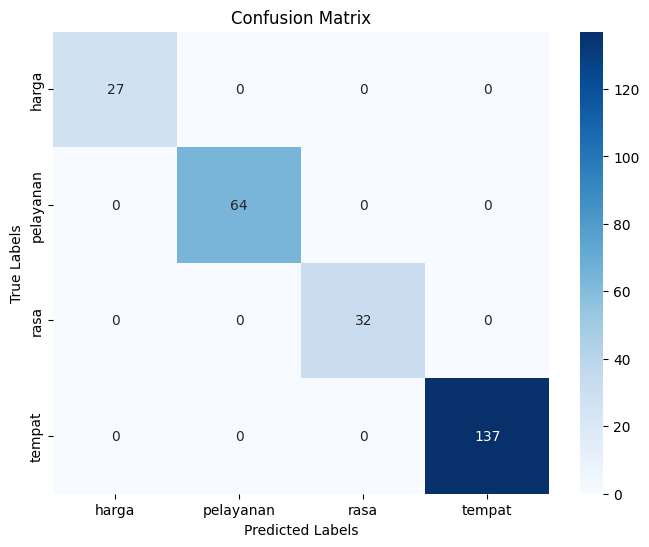

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities for each class
y_prob = model.predict(X_test_np)

# Get predicted class indices
y_pred = np.argmax(y_prob, axis=1)

# Get class labels from LabelEncoder
class_labels = label_encoder.classes_

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Save Model

In [ ]:
# Save the model
model.save('/content/drive/Shareddrives/Capstone/model/bilstm_aspect_model.h5')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Combining Model 1 and Model 2

In [ ]:
from setfit import AbsaModel, AbsaTrainer
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from collections import OrderedDict

class Model2:
    def __init__(self, model_name='indobenchmark/indobert-base-p1', max_length=128, lstm_model_path='/content/drive/Shareddrives/Capstone/model/bilstm_aspect_model.h5'):
        self.tokenizer = BertTokenizer.from_pretrained(model_name)
        self.model = BertModel.from_pretrained(model_name)
        self.max_length = max_length
        self.lstm_model = tf.keras.models.load_model(lstm_model_path)
        self.label_encoder = LabelEncoder()

        # Set aspect labels and fit the label encoder
        self.aspect_labels = ['harga', 'pelayanan', 'rasa', 'tempat']
        self.label_encoder.fit(self.aspect_labels)

    def get_bert_embeddings(self, span):
        inputs = self.tokenizer(span, return_tensors='pt', truncation=True, padding=True, max_length=self.max_length)
        with torch.no_grad():
            outputs = self.model(**inputs)
        return outputs.last_hidden_state.mean(dim=1).detach().numpy()

    def spans_to_embeddings(self, spans):
        embeddings = []
        for span in spans:
            embedding = self.get_bert_embeddings(span).flatten()
            embeddings.append(embedding)
        return np.array(embeddings)

    def extract_spans(self, preds):
        extracted_spans = []
        for pred in preds:
            if isinstance(pred, list) and all(isinstance(item, dict) for item in pred):
                spans = [item['span'] for item in pred]
            else:
                spans = []
            extracted_spans.append(spans)
        return extracted_spans

    def convert_all_spans_to_embeddings(self, extracted_spans):
        all_embeddings = []
        for spans in extracted_spans:
            if spans:  # Only convert if there are spans
                embeddings = self.spans_to_embeddings(spans)
                all_embeddings.append(embeddings)
            else:
                all_embeddings.append(np.array([]))  # Append empty array if no spans
        return all_embeddings

    def predict_with_lstm(self, embeddings_list):
        if self.lstm_model is None:
            raise ValueError("LSTM model is not loaded.")

        all_embeddings = np.concatenate([embeddings for embeddings in embeddings_list if embeddings.size > 0], axis=0)
        if all_embeddings.size == 0:
            return [[]] * len(embeddings_list)  # Return empty predictions if no embeddings

        all_embeddings = all_embeddings.reshape((all_embeddings.shape[0], 1, all_embeddings.shape[1]))
        preds = self.lstm_model.predict(all_embeddings)
        preds = np.argmax(preds, axis=1)
        aspects = self.label_encoder.inverse_transform(preds)

        predictions = []
        idx = 0
        for embeddings in embeddings_list:
            if embeddings.size > 0:
                predictions.append(aspects[idx : idx + len(embeddings)])
                idx += len(embeddings)
            else:
                predictions.append([])
        return predictions

    def combine_predictions(self, preds, lstm_predictions, ulasan):
        final_predictions = []
        for review, (pred, aspects) in zip(ulasan, zip(preds, lstm_predictions)):
            for item, aspect in zip(pred, aspects):
                final_predictions.append({
                    'Review': review,
                    'Aspek': aspect,
                    'Sentimen': item['polarity']
                })
        return pd.DataFrame(final_predictions)

    def run_pipeline(self, preds):
        extracted_spans = self.extract_spans(preds)
        all_embeddings = self.convert_all_spans_to_embeddings(extracted_spans)
        lstm_predictions = self.predict_with_lstm(all_embeddings)
        return lstm_predictions


In [ ]:
# creating an instance of the Model1 class
model2 = Model2()

# load test dataset
reviews = model1.preprocess_csv('test_dataset.csv', text_column='Review', label_column='sentimen')

# using the output previously from Model1()
preds = Input_model2

# Run the pipeline to get LSTM predictions
lstm_predictions = model2.run_pipeline(preds)

# Combine predictions with reviews
final_predictions = model2.combine_predictions(preds, lstm_predictions, reviews)

final_predictions.drop_duplicates(subset=['Review', 'Aspek', 'Sentimen'], inplace=True)

# Print the DataFrame
print(final_predictions)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


82/82 [==============================] - 1s 2ms/step
                                                 Review      Aspek Sentimen
0     Jika orang mengatakan McDonald's adalah tempat...  pelayanan  positif
1     Pelayanan yang sangat ramah, sangat cepat dan ...  pelayanan  positif
2     Pelayanan yang sangat ramah, sangat cepat dan ...     tempat  positif
7     Tempatnya bagus banget,comfy,makanannya enak p...     tempat  positif
8     Wort it banget si ini tempat pelayanannya bagu...     tempat  positif
...                                                 ...        ...      ...
2589                      Makanan dan tempat yang bagus     tempat  positif
2590           Jaga agar tempat tetap bersih dan nyaman     tempat  positif
2592  pelayanan buruk banget . Makanan enakk cuma di...  pelayanan  negatif
2593                   Tempat luar biasa untuk keluarga     tempat  positif
2594  Tempatnya enak buat makan rame2, keluarga, ram...     tempat  positif

[1317 rows x 3 columns]


## **Save Prediction result**

### dictionary format

In [ ]:
from collections import defaultdict, OrderedDict

final_predictions_dict = defaultdict(list)
for _, row in final_predictions.iterrows():
    review = row['Review']
    aspect_sentiment = {'Aspek': row['Aspek'], 'Sentimen': row['Sentimen']}
    final_predictions_dict[review].append(aspect_sentiment)

# Convert to regular dictionary (optional)
final_predictions_dict = dict(final_predictions_dict)

# Print the dictionary
print(final_predictions_dict)

{'makanannya enak enak, pelayanannya juga mantap, terbaik lah': [{'Aspek': 'pelayanan', 'Sentimen': 'positif'}], 'Rasanya ga pernah bisa bohong, setiap ke McD selalu yang keinget ayam spicy sama mc flurry. Kadang juga ada menu seasonal dan event kaya BTS lalu yang paling ga bisa lupa mc fries shake shake rasa BBQ dulu event piala dunia enak banget sih …': [{'Aspek': 'rasa', 'Sentimen': 'positif'}], 'Rasanya selalu enak gak pernah berubah, higines. Anak2 pada suka makan ayam goreng mcd': [{'Aspek': 'rasa', 'Sentimen': 'positif'}], 'Pelayanannya cukup ramah dan praktis. Makanannya enak dan segar, khususnya es krim. Sip, lah.': [{'Aspek': 'pelayanan', 'Sentimen': 'positif'}], 'Menu season yang paling melekat di hati, ayam gulai mcd, orangtua sampai anak2 suka. Pelayanannya bagus dine in atau take away semua bagus. Males masak ya ke McD aja  bawa anak2, kenyang & happy😅 …': [{'Aspek': 'pelayanan', 'Sentimen': 'positif'}], 'Makan disini selain bisa buat kenyang rasanya juga nikmat\nApalagi 

### csv format

In [ ]:
final_predictions.to_csv('final_predictions.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### json format

In [ ]:
final_predictions.to_json('final_predictions.json', orient='records', lines=True)

# **Prediction Results**

During this, we need dataset from `Review`, `aspek`, and `sentimen`columns. The rest of the columns are dropped.

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Capstone/input/dataset labeled.csv')

df = df.drop(['No.', 'span', 'ordinal'], axis=1)

df.head()

,Review,aspek,sentimen
0,"makanannya enak enak, pelayanannya juga mantap...",pelayanan,positif
1,"Rasanya ga pernah bisa bohong, setiap ke McD s...",rasa,positif
2,"Rasanya selalu enak gak pernah berubah, higine...",rasa,positif
3,Pelayanannya cukup ramah dan praktis. Makanann...,pelayanan,positif
4,"Tempatnya nyaman bersih ,makanannya recommende...",tempat,positif


We split the dataset the same way we split data on `Extract Span and Polarity`

In [ ]:
# Define the split index
split_index = int(0.3 * len(df))

# Split the dataset sequentially
train_df = df[:split_index]
test_df = df[split_index:]

# Verify the split
print(f"Training set size: {train_df.shape[0]}")
print(f"Test set size: {test_df.shape[0]}")

Training set size: 777
Test set size: 1816


In [ ]:
import pandas as pd
from datasets import Dataset

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

In [ ]:
test_dataset.to_csv('test_dataset.csv', index=False)

Creating CSV from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

312209

Combine test_dataset and final_predictions into one dataframe

In [ ]:
# read test_dataset and final_predictions csv
final_predictions = pd.read_csv('final_predictions.csv')
test_dataset = pd.read_csv('test_dataset.csv')

# Selected the required column from final_predictions and renamed it
final_predictions = final_predictions[['Aspek', 'Sentimen']]
final_predictions.columns = ['Aspek_pred', 'Sentimen_pred']

# combine test_dataset and final_predictions
combined_df = pd.concat([test_dataset, final_predictions], axis=1)

# Displays combined frame data
combined_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review,aspek,sentimen,Aspek_pred,Sentimen_pred
0,Jika orang mengatakan McDonald's adalah tempat...,pelayanan,positif,pelayanan,positif
1,"Pelayanan yang sangat ramah, sangat cepat dan ...",pelayanan,positif,pelayanan,positif
2,"Pelayanan yang sangat ramah, sangat cepat dan ...",tempat,positif,tempat,positif
3,"Tempatnya bagus banget,comfy,makanannya enak p...",tempat,positif,tempat,positif
4,Wort it banget si ini tempat pelayanannya bagu...,tempat,positif,none,none


In [ ]:
combined_df['Overall_Correct'] = (combined_df['aspek'] == combined_df['Aspek_pred']) & (combined_df['sentimen'] == combined_df['Sentimen_pred'])

# accuracy for overall predictions
accuracy_overall = combined_df['Overall_Correct'].mean()
print(f"Overall Accuracy: {accuracy_overall}")

# accuracy for aspect predictions
accuracy_aspek = accuracy_score(combined_df['sentimen'], combined_df['Sentimen_pred'])
print(f"Aspect Accuracy: {accuracy_aspek}")

# accuracy for sentiment predictions
accuracy_sentiment = accuracy_score(combined_df['sentimen'], combined_df['Sentimen_pred'])
print(f"Sentiment Accuracy: {accuracy_sentiment}")


Overall Accuracy: 0.8153428377460964
Aspect Accuracy: 0.8241683638832314
Sentiment Accuracy: 0.8241683638832314
